**Importing and Processing Data**

In [52]:
import pandas as pd
import matplotlib.pyplot as plt 
#import data 
df=pd.read_csv("finance_liquor_sales.csv")

#turn data column in date time format and choose 2016-2019
df['date']=pd.to_datetime(df['date'])
data_filtered=df[(df['date'].dt.year>=2016) & (df['date'].dt.year<=2019)].reset_index()

**Task A**

In [59]:
selected_columns=['zip_code','item_number','bottles_sold']
selected_data=data_filtered[selected_columns]
grouped=selected_data.groupby(['zip_code','item_number'])['bottles_sold'].sum().reset_index()
#finding popular bottles 
idx=grouped.groupby("zip_code")["bottles_sold"].idxmax()
popular_bottles=grouped.loc[idx].reset_index()
popular_sorted=popular_bottles.sort_values(by="bottles_sold",ascending=False).head(15)
popular_sorted["zip_code"] = popular_sorted["zip_code"].astype(int)

**Task B**

In [61]:
#task B columns selection 
data_columns=['store_name','sale_dollars']
data_from_columns=data_filtered[data_columns]
#Calculate total revenue of all stars and then sale/revenue*100
store_sales=data_from_columns.groupby('store_name')['sale_dollars'].sum().reset_index()
revenue=sum(data_from_columns['sale_dollars'])
store_sales['Percentage']=((store_sales['sale_dollars']/revenue)*100).round(2)
percentage_sorted = store_sales.sort_values(by='Percentage', ascending=True).tail(15)


**Plotting Data**

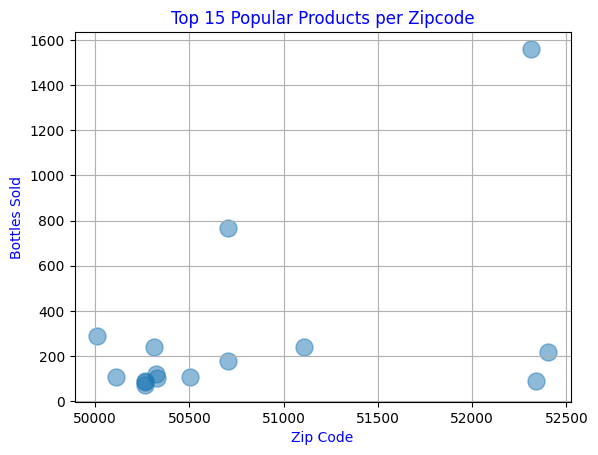

In [55]:
#plot for task A with scatterplot 
p=plt.scatter(popular_sorted['zip_code'],popular_sorted['bottles_sold'],s=150,alpha=0.5)
#plotting info 
plt.title("Top 15 Popular Products per Zipcode",fontsize=12,color='blue')
plt.xlabel("Zip Code",color='blue')
plt.ylabel("Bottles Sold",color='blue')
plt.grid("True")
plt.show()

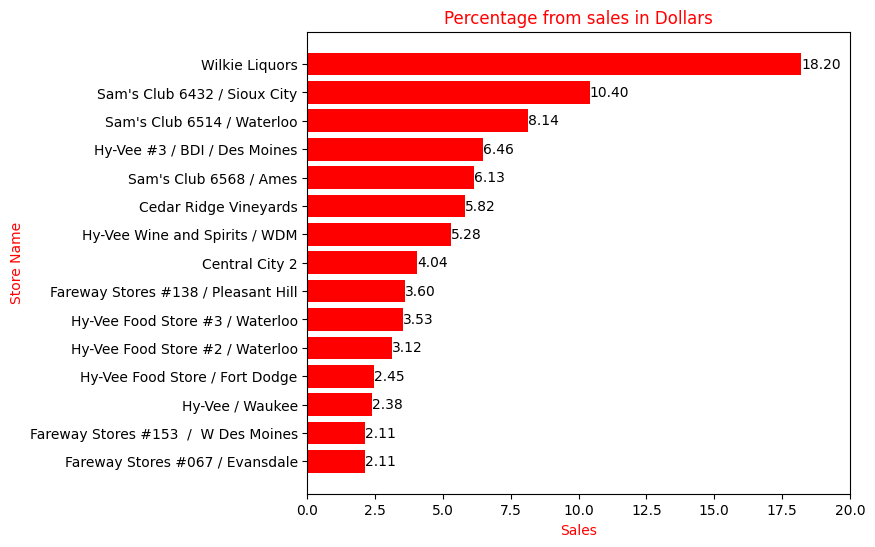

In [56]:
#plot for task B 
fig = plt.figure(figsize=(7,6))
p=plt.barh(percentage_sorted['store_name'],percentage_sorted['Percentage'],color='red')
#plotting info 
plt.title("Percentage from sales in Dollars",fontsize=12,color='red')
plt.xlabel("Sales",color='red')
plt.ylabel("Store Name",color='red')
plt.bar_label(p, fmt="%.2f")
plt.xlim([0,20])
plt.show()